In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("ADANIENT.NS (1).csv", parse_dates=True, index_col='Date')

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-09-18,41.058308,43.101688,41.058308,42.475052,41.152264,16642761
2015-09-21,41.848415,45.199554,41.466984,44.218735,42.841637,10205902
2015-09-22,44.518429,45.771702,42.257092,42.720257,41.389832,7453139
2015-09-23,41.439739,44.136997,41.412495,43.592098,42.234520,7308058
2015-09-24,43.592098,44.273224,42.774746,43.755569,42.392895,6136409


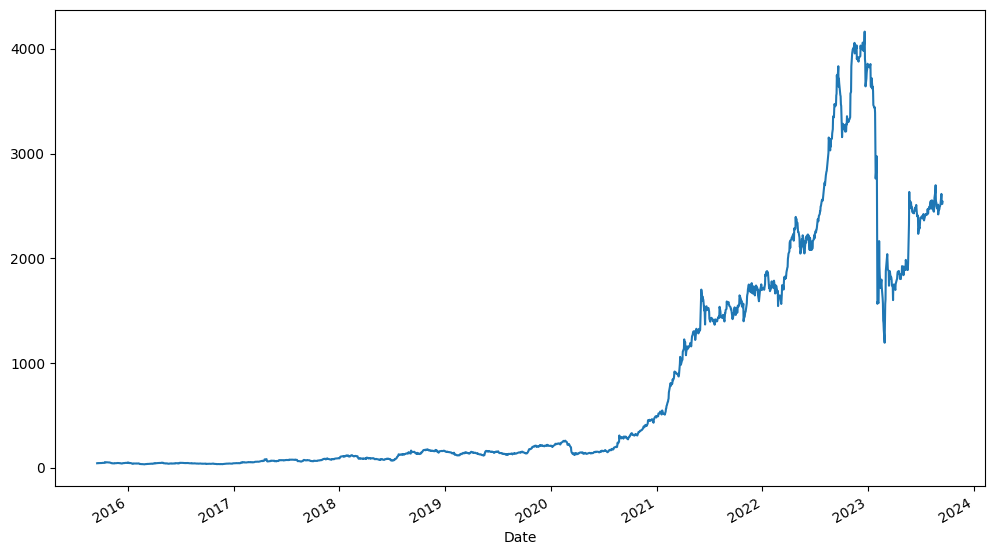

In [4]:
data['Close'].plot(figsize=(12, 7));

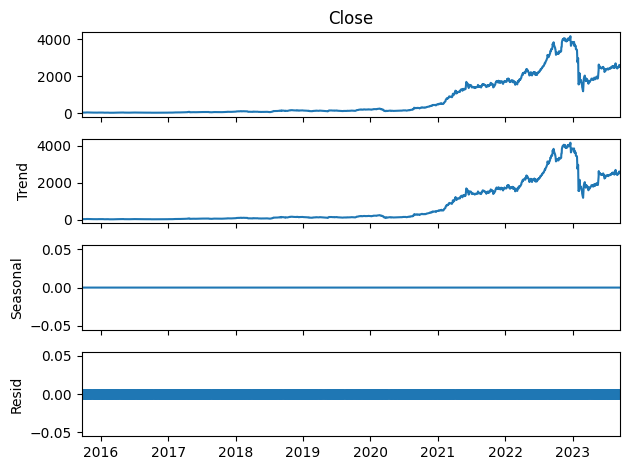

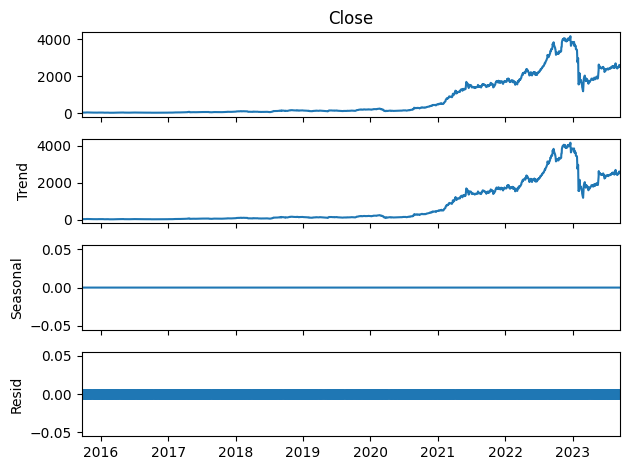

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(data['Close'], period=1).plot()

In [6]:
# stationarity
shifted_data = data['Close'].shift(1)

In [7]:
data['Shifted_Diff'] = shifted_data-data['Close']

In [8]:
shifted_data2 = data['Close'].shift(2)
data['Second_Shifted_Diff'] = shifted_data2-data['Close']

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
adfuller(data['Close'], autolag='AIC')

(-0.797125984568358,
 0.8199648304786646,
 26,
 1947,
 {'1%': -3.4337130931808058,
  '5%': -2.86302561129431,
  '10%': -2.5675608796776626},
 20219.942716719917)

In [11]:
adfuller(data['Second_Shifted_Diff'].dropna(), autolag='AIC')

(-7.508303836600537,
 4.078758409192814e-11,
 26,
 1945,
 {'1%': -3.4337165559544514,
  '5%': -2.8630271400760288,
  '10%': -2.567561693684287},
 20224.248200886832)

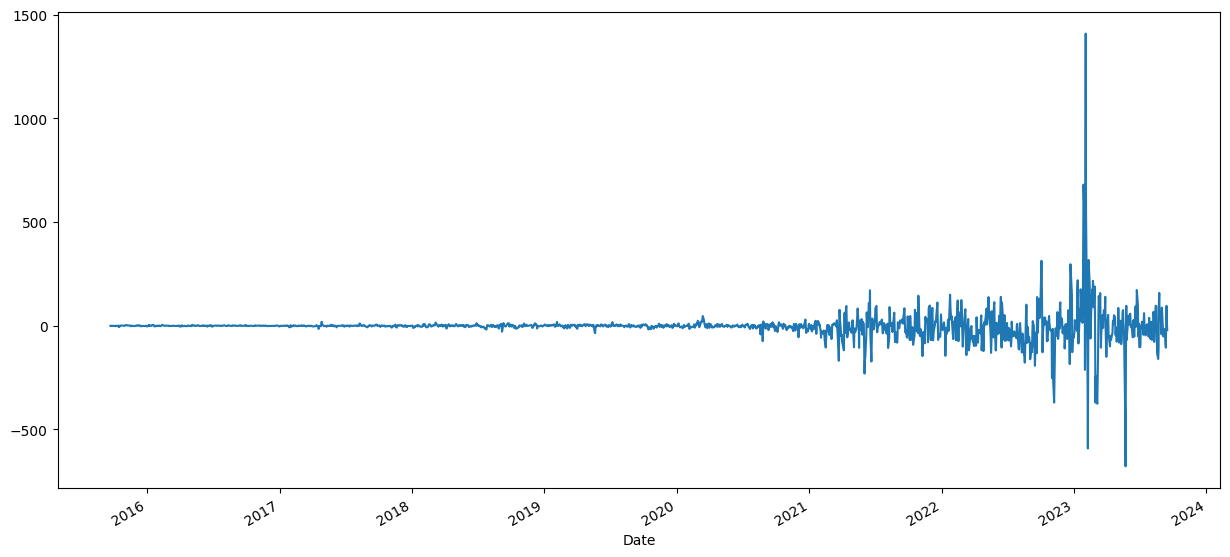

In [12]:
data['Second_Shifted_Diff'].dropna().plot(figsize=(15, 7));

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

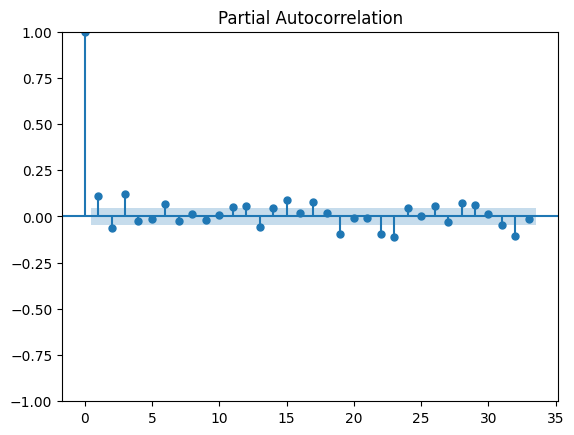

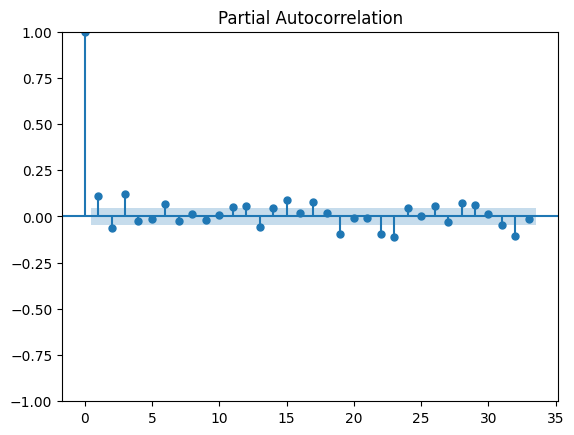

In [14]:
plot_pacf(data['Shifted_Diff'].dropna())

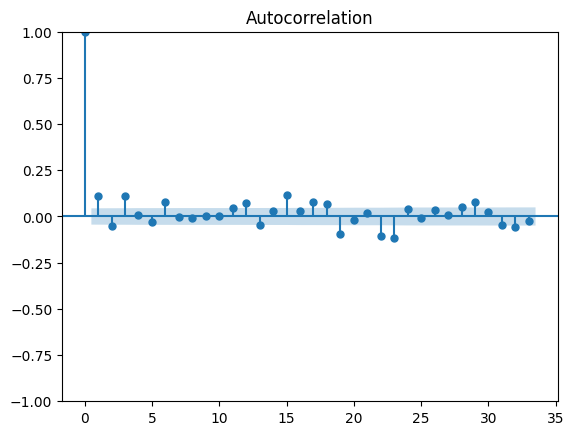

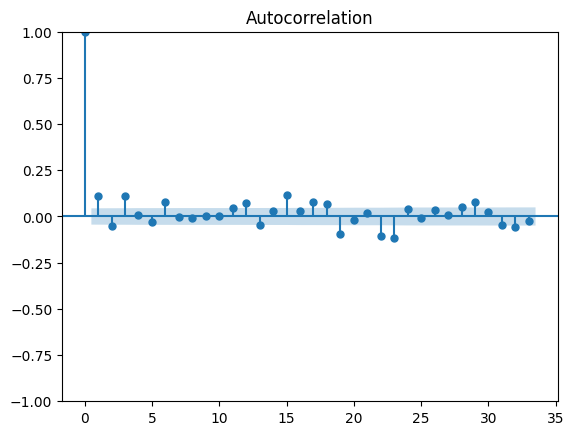

In [15]:
plot_acf(data['Shifted_Diff'].dropna())

In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
model = ARIMA(data['Close'], order=(3, 1, 3)).fit()

c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1974
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -10263.638
Date:                Mon, 30 Oct 2023   AIC                          20541.276
Time:                        08:25:07   BIC                          20580.387
Sample:                             0   HQIC                         20555.647
                               - 1974                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6289      0.060    -10.457      0.000      -0.747      -0.511
ar.L2         -0.4268      0.066     -6.419      0.000      -0.557      -0.296
ar.L3          0.3926      0.055      7.109      0.000       0.284       0.501
ma.L1          0.7599      0.062     12.345      0.000       0.639       0.880
ma.L2          0.4841      0.070      6.922      0.000       0.347       0.621
ma.L3         -0.2826      0.056     -5.062      0.000      -0.392      -0.173
sigma2      1919.1081     13.380    143.429      0.000    1892.884    1945.333
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):            643475.23
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):            1390.30   Skew:                            -4.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        90.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [20]:
np.sqrt(mean_squared_error(data['Close'], model.predict()))

43.94878347486473

In [21]:
len(data['Adj Close'])

1974

In [22]:
train_len = 0.8*1974

In [23]:
train_len = int(np.round(train_len))
train_len

1579

In [24]:
test_len = len(data['Adj Close']) - train_len
test_len

395

In [25]:
train_len+test_len == len(data['Close']) ##verification

True

In [26]:
training_data = data.iloc[0:train_len]
testing_data = data.iloc[train_len:test_len+train_len]

In [27]:
len(training_data), len(testing_data)

(1579, 395)

In [28]:
model_train = ARIMA(training_data['Close'], order=(1, 1, 2)).fit()
model_train.summary() #checking p values of AR and MA components

c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1579
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -6657.743
Date:                Mon, 30 Oct 2023   AIC                          13323.486
Time:                        08:25:09   BIC                          13344.942
Sample:                             0   HQIC                         13331.459
                               - 1579                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0777      0.189     -0.410      0.682      -0.449       0.293
ma.L1          0.1166      0.189      0.618      0.537      -0.254       0.487
ma.L2         -0.0494      0.012     -4.259      0.000      -0.072      -0.027
sigma2       270.5137      2.646    102.218      0.000     265.327     275.701
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             44016.31
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):             281.51   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
model_train = ARIMA(training_data['Close'], order=(2, 1, 2)).fit()
model_train.summary()

c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1579
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6620.832
Date:                Mon, 30 Oct 2023   AIC                          13251.664
Time:                        08:25:12   BIC                          13278.484
Sample:                             0   HQIC                         13261.630
                               - 1579                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5931      0.004   -146.595      0.000      -0.601      -0.585
ar.L2         -0.9665      0.003   -314.766      0.000      -0.973      -0.960
ma.L1          0.6534      0.002    292.940      0.000       0.649       0.658
ma.L2          0.9896      0.003    395.350      0.000       0.985       0.995
sigma2       257.7272      2.597     99.232      0.000     252.637     262.818
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):             43275.04
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):             263.41   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
np.sqrt(mean_squared_error(training_data['Close'], model_train.predict()))

16.08454613876663

In [31]:
training_data['predicted_training_values'] = model_train.predict()

C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_6208\4201140036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['predicted_training_values'] = model_train.predict()


In [32]:
model_train.predict()

Date
2015-09-18       0.000000
2015-09-21      42.475536
2015-09-22      44.291179
2015-09-23      42.556710
2015-09-24      43.707675
                 ...     
2022-02-07    1752.012011
2022-02-08    1725.060519
2022-02-09    1724.094439
2022-02-10    1788.215473
2022-02-11    1776.509313
Name: predicted_mean, Length: 1579, dtype: float64

In [33]:
training_data.head()

,Open,High,Low,Close,Adj Close,Volume,Shifted_Diff,Second_Shifted_Diff,predicted_training_values
Date,,,,,,,,,
2015-09-18,41.058308,43.101688,41.058308,42.475052,41.152264,16642761,NaN,NaN,0.000000
2015-09-21,41.848415,45.199554,41.466984,44.218735,42.841637,10205902,-1.743683,NaN,42.475536
2015-09-22,44.518429,45.771702,42.257092,42.720257,41.389832,7453139,1.498478,-0.245205,44.291179
2015-09-23,41.439739,44.136997,41.412495,43.592098,42.234520,7308058,-0.871841,0.626637,42.556710
2015-09-24,43.592098,44.273224,42.774746,43.755569,42.392895,6136409,-0.163471,-1.035312,43.707675


In [34]:
testing_data['test_predict'] = [model_train.predict(p).iloc[0] for p in range(train_len, train_len+test_len)]

c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


KeyboardInterrupt: 

In [ ]:
np.sqrt(mean_squared_error(testing_data['Close'], testing_data['test_predict']))

1094.1999570949197

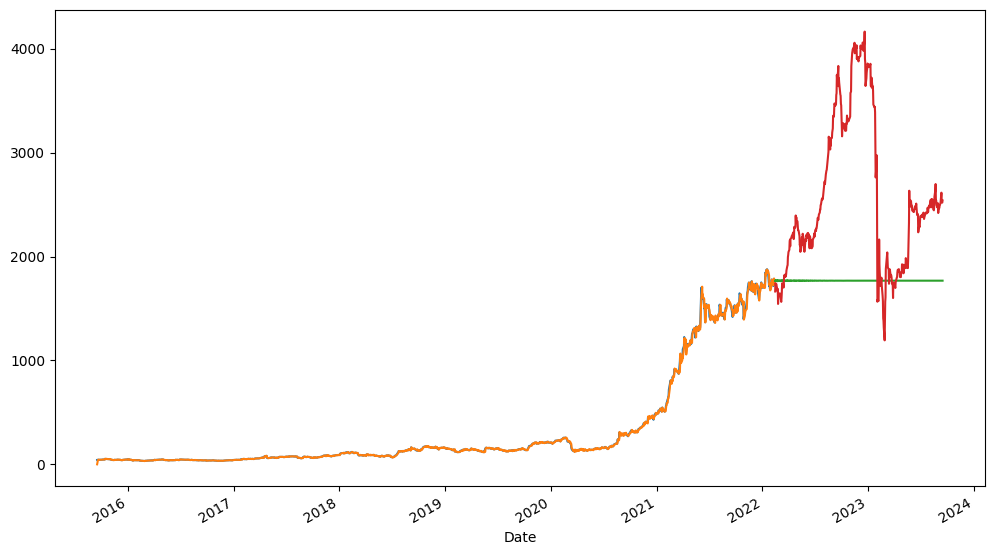

In [ ]:
import matplotlib.pyplot as plt
training_data['Close'].plot(figsize=(12, 7))
training_data['predicted_training_values'].plot(figsize=(12, 7))
testing_data['test_predict'].plot(figsize=(12, 7))
testing_data['Close'].plot(figsize=(12, 7))
plt.show()

<Axes: xlabel='Date'>

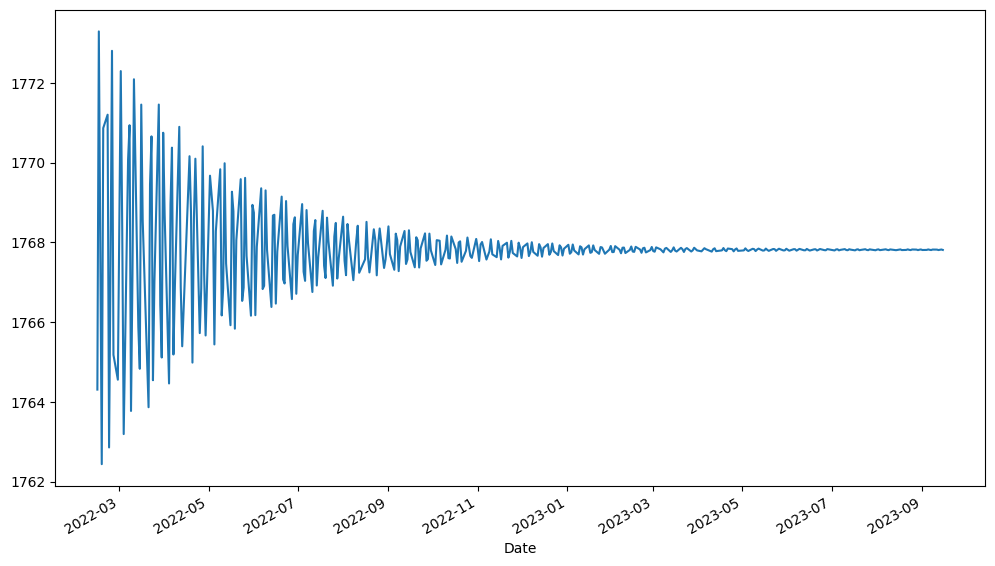

In [ ]:
testing_data['test_predict'].plot(figsize=(12, 7))

<Axes: xlabel='Date'>

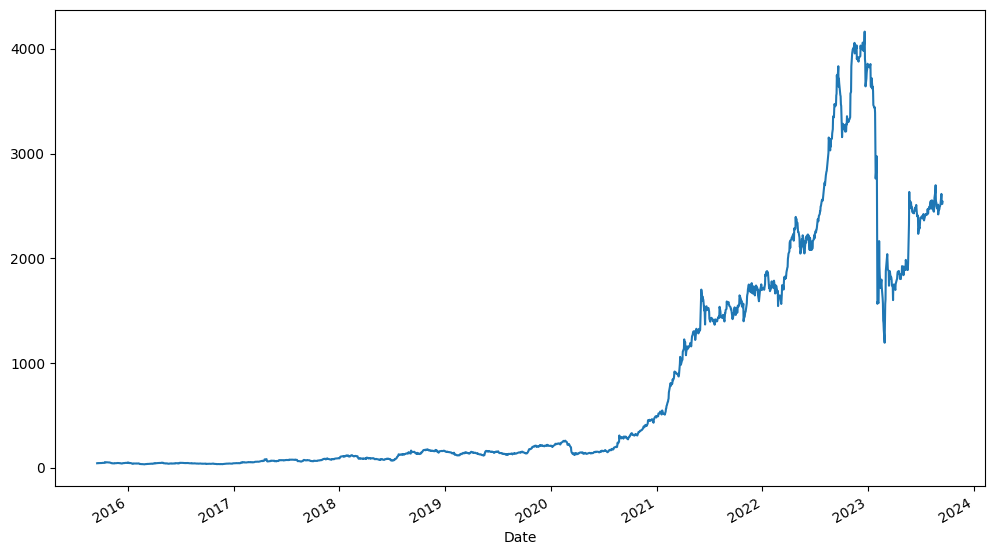

In [ ]:
data['Close'].plot(figsize=(12, 7))

In [ ]:
post_drop = data['Close'].iloc[int(np.round(len(data['Close'])*0.8)):]

<Axes: xlabel='Date'>

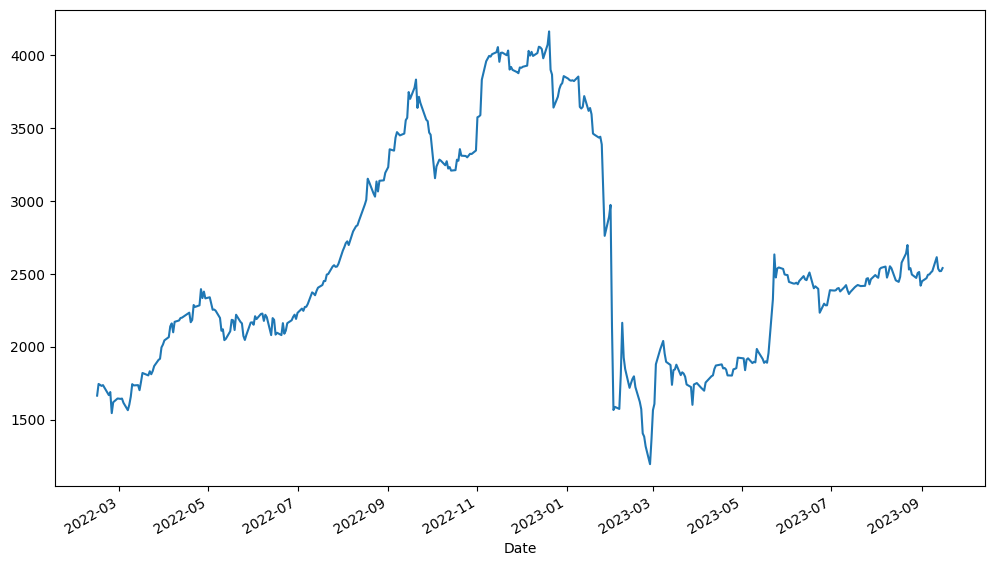

In [ ]:
post_drop.plot(figsize=(12, 7))

In [ ]:
post_drop = data['2023-07':]['Close']

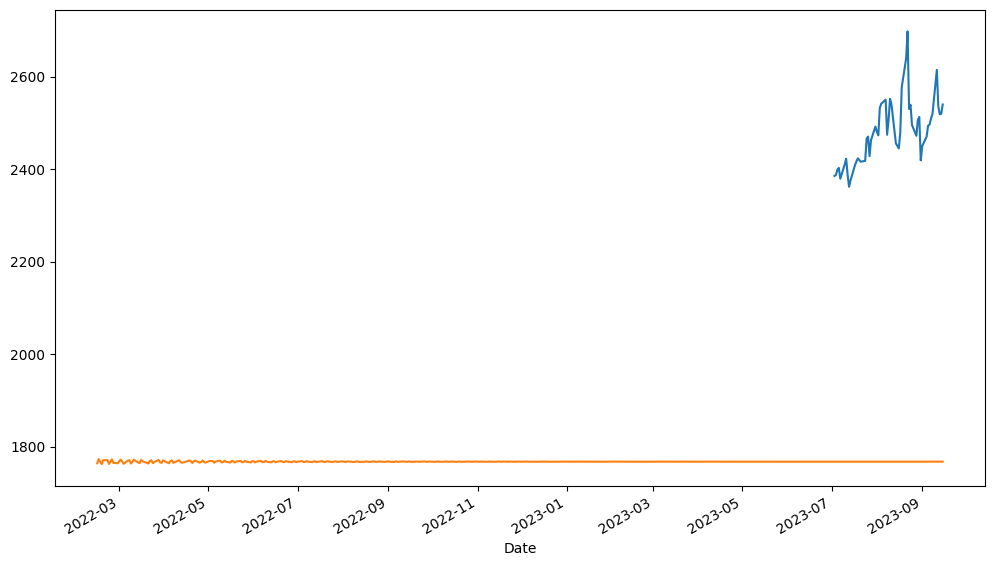

In [ ]:
post_drop.plot(figsize=(12, 7))
testing_data['test_predict'].plot(figsize=(12, 7))
plt.show()

<Axes: xlabel='Date'>

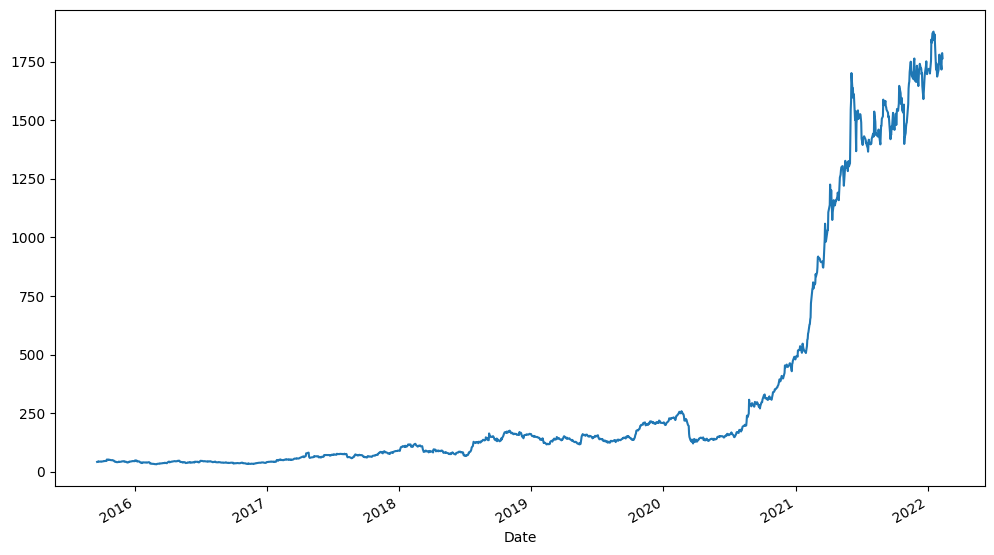

In [ ]:
training_data['Close'].plot(figsize=(12, 7))

In [ ]:
len(post_drop)

54

<Axes: xlabel='Date'>

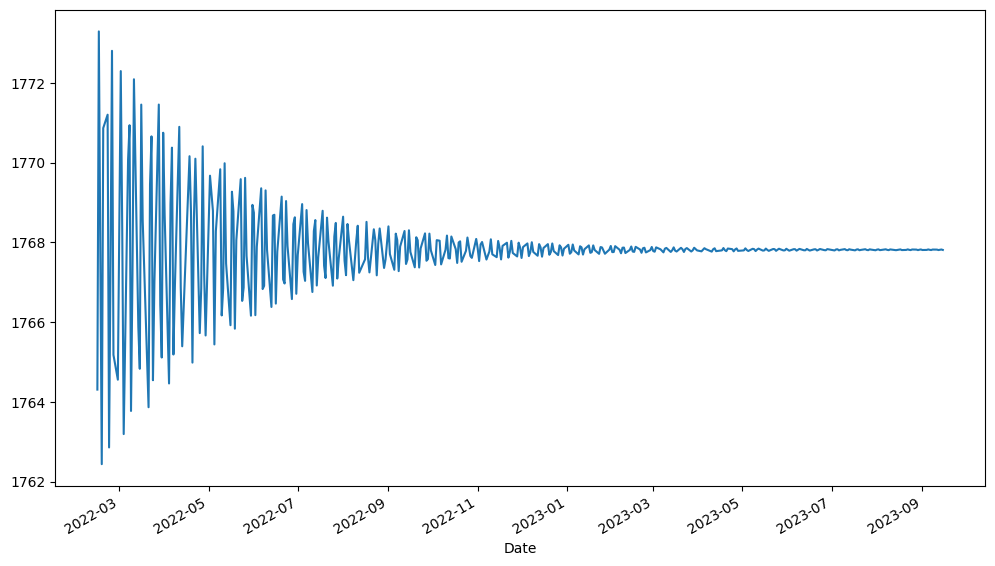

In [ ]:
testing_data['test_predict'].plot(figsize=(12, 7))

In [ ]:
data['resampled_M'] = data['Close'].resample('MS').mean()

<Axes: xlabel='Date'>

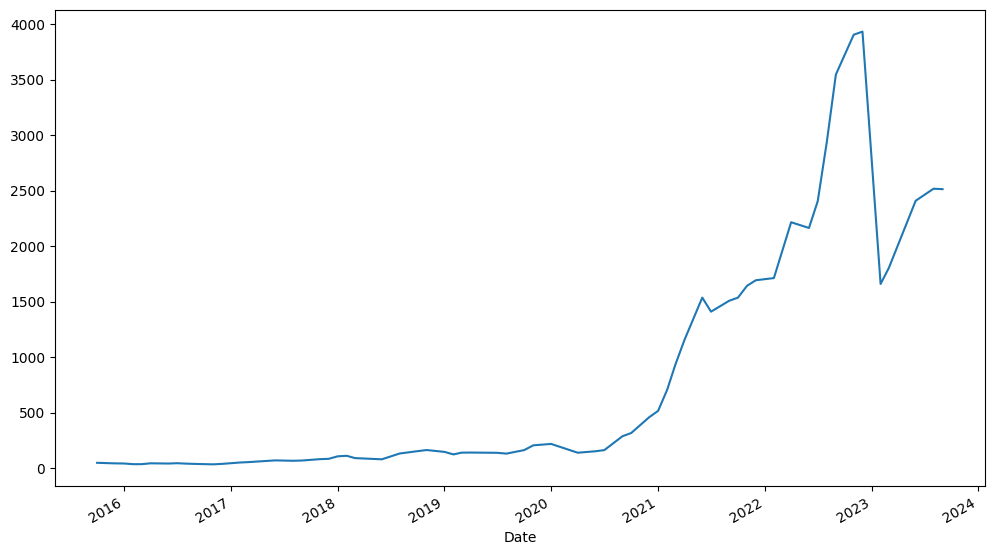

In [ ]:
data['resampled_M'].dropna().plot(figsize=(12, 7))

In [ ]:
testing_data.values.shape

(395, 9)

In [ ]:
from tensorflow import keras
from keras.layers import RNN
from sklearn.preprocessing import MinMaxScaler

In [ ]:
week = data['Close'].resample('W').mean().values.reshape(-1, 1)

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(week)

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

280 138


In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
from keras import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
278/278 - 7s - loss: 4.1425e-04 - 7s/epoch - 24ms/step
Epoch 2/100
278/278 - 1s - loss: 3.4058e-04 - 1s/epoch - 4ms/step
Epoch 3/100
278/278 - 1s - loss: 2.4921e-04 - 1s/epoch - 5ms/step
Epoch 4/100
278/278 - 2s - loss: 1.6145e-04 - 2s/epoch - 6ms/step
Epoch 5/100
278/278 - 2s - loss: 8.4899e-05 - 2s/epoch - 6ms/step
Epoch 6/100
278/278 - 1s - loss: 3.7644e-05 - 1s/epoch - 5ms/step
Epoch 7/100
278/278 - 1s - loss: 1.3794e-05 - 1s/epoch - 5ms/step
Epoch 8/100
278/278 - 1s - loss: 6.9587e-06 - 1s/epoch - 5ms/step
Epoch 9/100
278/278 - 1s - loss: 6.0076e-06 - 1s/epoch - 4ms/step
Epoch 10/100
278/278 - 2s - loss: 6.0840e-06 - 2s/epoch - 7ms/step
Epoch 11/100
278/278 - 1s - loss: 6.0513e-06 - 1s/epoch - 5ms/step
Epoch 12/100
278/278 - 1s - loss: 6.4242e-06 - 1s/epoch - 5ms/step
Epoch 13/100
278/278 - 2s - loss: 6.7906e-06 - 2s/epoch - 6ms/step
Epoch 14/100
278/278 - 2s - loss: 7.5056e-06 - 2s/epoch - 6ms/step
Epoch 15/100
278/278 - 2s - loss: 7.2378e-06 - 2s/epoch - 6ms/step
Epo

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

5/5 [==============================] - 0s 3ms/step
Train Score: 12.54 RMSE
Test Score: 208.26 RMSE


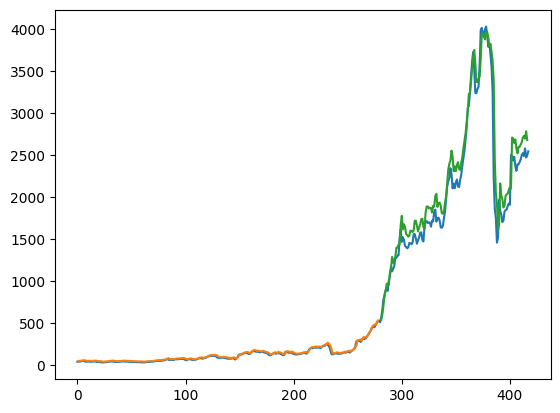

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()